### Problem Description

Write some details about the problem

## Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge


### Read Dataset

In [2]:
df = pd.read_excel("Online Retail.xlsx",sheet_name=0)
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## EDA

In [4]:
missing_percentage = (df.isna().sum()/len(df['StockCode']))*100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
df=df.dropna()

In [6]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

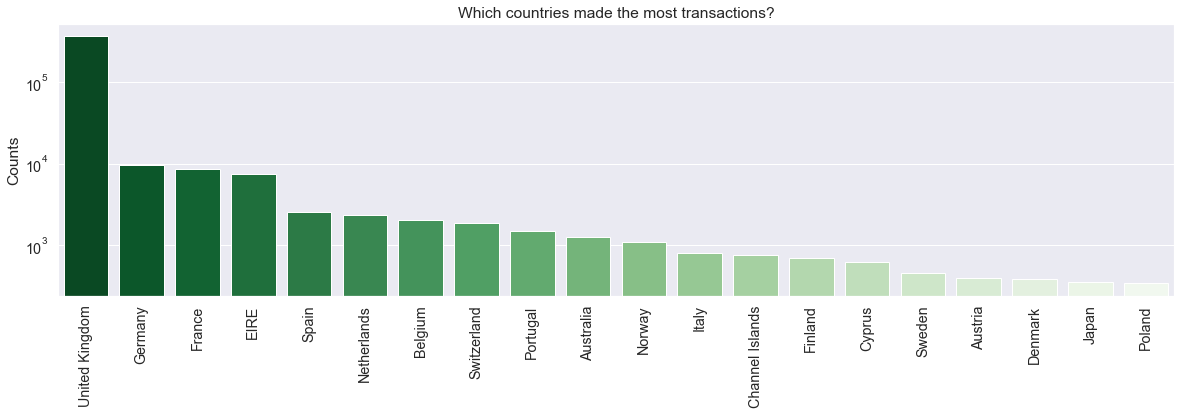

In [25]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [8]:
df['CustomerID'] = df['CustomerID'].astype('int64').astype('category')
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [9]:

df_top_10 =df[['CustomerID', 'Revenue']].groupby('CustomerID', as_index = False).sum()
df_top_10 =df_top_10.sort_values(by='Revenue',ascending=False)
df_top_10 [:10]

,CustomerID,Revenue
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187482.17
1895,14911,132572.62
55,12415,123725.45
1345,14156,113384.14
3801,17511,88125.38
3202,16684,65892.08
1005,13694,62653.10
2192,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [10]:
df_top_cust =  df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index = False).count()
df_top_cust.sort_values(by='InvoiceNo',ascending=False, inplace = True)
df_top_cust.rename(columns = {'InvoiceNo': 'frequent Customers'}, inplace = True)
df_top_cust[:5]

,CustomerID,frequent Customers
4042,17841,7983
1895,14911,5903
1300,14096,5128
330,12748,4642
1674,14606,2782


In [11]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

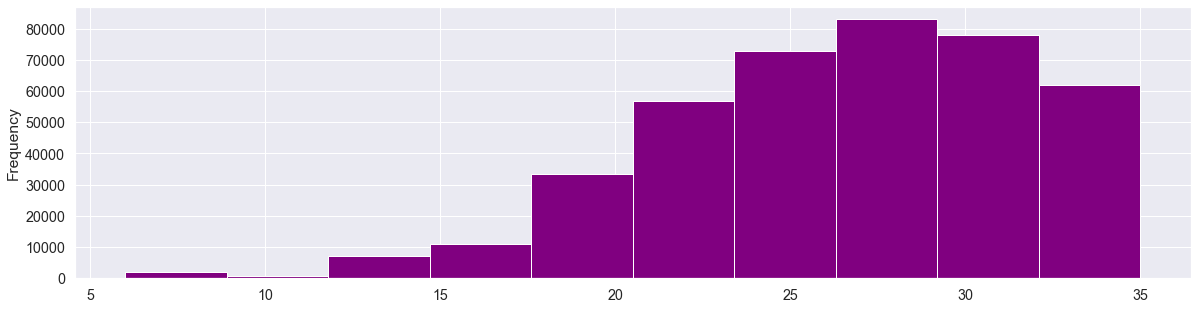

In [20]:
df['Description'].str.len( ).plot(kind='hist',color='purple',figsize=(20,5),x='description length',y='count')

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [21]:

df["Year"] =  df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] =df.InvoiceDate.dt.month 
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] =df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] =df.InvoiceDate.dt.dayofyear
df["Date"] =df.InvoiceDate.dt.date

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [23]:
grouped_features = {'Date':df['Date'],'Year':df['Year'],'Quarter':df['Quarter'],'Month':df['Month'],'Week':df['Week'],'Weekday':df['Weekday'],'Dayofyear':df['Dayofyear'],'Day':df['Day'],'StockCode':df['StockCode'],'Quantity':df['Quantity'],'Revenue':df['Revenue']}

In [24]:
grouped_features=pd.DataFrame(grouped_features)
grouped_features.head(4)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,85123A,6,15.30
1,2010-12-01,2010,4,12,48,2,335,1,71053,6,20.34
2,2010-12-01,2010,4,12,48,2,335,1,84406B,8,22.00
3,2010-12-01,2010,4,12,48,2,335,1,84029G,6,20.34


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook